In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
data=pd.read_csv(r'D:\basic\Python\13_sept\candy-data.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [10]:
data=data.drop(['competitorname'],axis=1)

In [12]:
data.head(10)


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


#split data into train data set

In [13]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
# creating the dataframe for train and test data
train_data=training_set
test_data=test_set

In [16]:
x_train=train_data[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus']]
y_train=train_data['chocolate']
x_test=test_data[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus']]
y_test=test_data['chocolate']

In [17]:
x_train.shape
y_train.shape

(68,)

In [18]:
y_train.value_counts()

chocolate
0    39
1    29
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_2264\1617390471.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chocolate',data=train_data,palette='Blues_d')


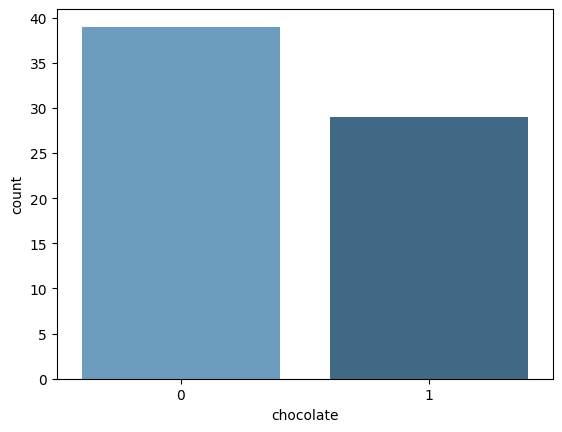

<Figure size 640x480 with 0 Axes>

In [25]:
sns.countplot(x='chocolate',data=train_data,palette='Blues_d')
plt.show()
plt.savefig('count_plot')

# model development and predection

In [26]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[9 0]
 [3 5]]


Text(0.5, 427.9555555555555, 'Predicted label')

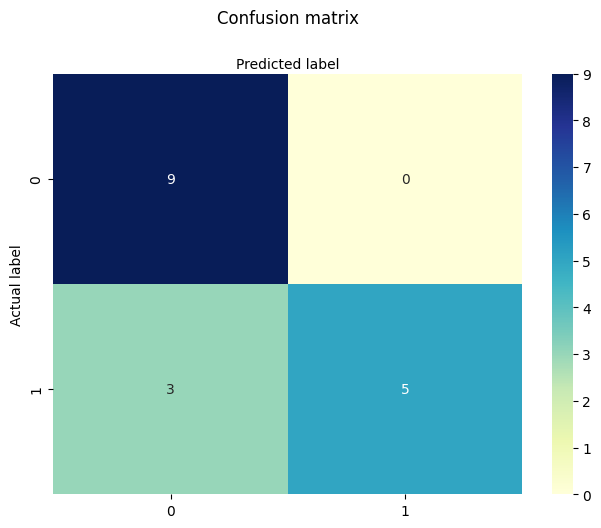

In [ ]:
#visualizing the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")  

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# CFM evalution metrics Accuracy,Precision Recall

In [29]:
print("accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))

accuracy: 0.8235294117647058
precision: 1.0
recall: 0.625
